# Depreciation rates

Setup

In [1]:
# Apply magic
%load_ext autoreload
%autoreload 2

# import packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
!pip install git+https://github.com/Kristianuruplarsen/pydst.git

os.chdir('..')
from src.visualization.visualize import plot_delta

### 1. Get data

I extract data on capital and investments from DST's NABK69 tabel. I store the data locally such that the output results always can be retracked back to its source data. 

I call the function data.extract() to extract the data and data.transform() transform data. See source code in src.data folder.

In [2]:
from src.data.extract import extract
extract()

In [3]:
from src.data.transform import transform
transform()

I load the data into memory

In [4]:
K = pd.read_csv('data/processed/NABK69_K.csv', index_col=['BRANCHE','TID','AKTIV'], usecols=['BRANCHE','TID','AKTIV','Current prices'])
I = pd.read_csv('data/processed/NABK69_I.csv', index_col=['BRANCHE','TID','AKTIV'], usecols=['BRANCHE','TID','AKTIV','Current prices'])

### 2. Inspect data

Inspect data structure

In [5]:
K

Current prices
BRANCHE TID  AKTIV                
bol     1993 B             1364715
             M                3592
        1994 B             1395313
             M                3904
        1995 B             1432362
...                            ...
udv     2016 M               37185
        2017 B               67458
             M               35118
        2018 B               68057
             M               34241

[468 rows x 1 columns]

In [6]:
I

Current prices
BRANCHE TID  AKTIV                
bol     1993 B             30531.0
             M               782.0
        1994 B             34912.0
             M              1006.0
        1995 B             39782.0
...                            ...
udv     2016 M              3232.0
        2017 B              1414.0
             M              1309.0
        2018 B              2707.0
             M              1712.0

[468 rows x 1 columns]

Inspect descriptive statistics for different sectors

In [7]:
K.groupby(['BRANCHE','AKTIV']).describe()

Current prices                                          \
                       count          mean            std        min   
BRANCHE AKTIV                                                          
bol     B               26.0  2.202955e+06  562541.528567  1364715.0   
        M               26.0  6.681038e+03    2034.074974     3592.0   
byg     B               26.0  1.958177e+04    5865.854354    10809.0   
        M               26.0  2.746435e+04    4147.962092    18480.0   
ene     B               26.0  1.910479e+05   41774.607099   119134.0   
        M               26.0  2.748873e+04   12458.414004    15163.0   
fre     B               26.0  1.581430e+05   40426.049925    91904.0   
        M               26.0  2.234630e+05   48867.947967   141493.0   
lan     B               26.0  1.402148e+05   14902.854731   111721.0   
        M               26.0  6.101323e+04    5078.358446    54488.0   
off     B               26.0  5.006983e+05   96626.015331   357057.0   
        M               26.0  2.351029e+05   63923.475474   125836.0   
soe     B               26.0  1.057192e+04    6608.592201     2277.0   
        M               26.0  1.021286e+05   31341.474125    57491.0   
tje     B               26.0  7.074600e+05  162081.650387   444063.0   
        M               26.0  3.885828e+05   95952.416668   226055.0   
udv     B               26.0  4.631562e+04   18014.394835    16258.0   
        M               26.0  2.596404e+04    5994.335202    18795.0   

                                                             
                      25%        50%         75%        max  
BRANCHE AKTIV                                                
bol     B      1738218.00  2209564.0  2622532.50  3202050.0  
        M         4670.75     7020.5     7996.50    10546.0  
byg     B        14117.00    19980.5    24223.00    30088.0  
        M        25080.00    28770.0    30364.50    34003.0  
ene     B       156718.50   193334.5   227149.25   261434.0  
        M        17268.50    22255.0    33174.00    52715.0  
fre     B       122528.25   162326.0   189344.50   229046.0  
        M       185825.50   222423.0   263913.25   306375.0  
lan     B       126976.75   147199.0   151359.75   161800.0  
        M        56933.25    58173.5    66175.75    70210.0  
off     B       418281.00   510523.5   584705.25   672505.0  
        M       187363.25   235768.5   290632.75   332594.0  
soe     B         4179.75    11722.0    16721.75    19754.0  
        M        71489.25   100374.5   121007.25   158344.0  
tje     B       556461.00   745034.0   838625.50   951188.0  
        M       308351.00   393580.5   462702.00   558143.0  
udv     B        29592.50    50422.5    61866.50    68057.0  
        M        20966.25    24227.0    29542.25    38051.0

In [8]:
I.groupby(['BRANCHE','AKTIV']).describe()

Current prices                                                 \
                       count          mean           std      min       25%   
BRANCHE AKTIV                                                                 
bol     B               26.0  72158.615385  23838.969268  30531.0  55023.25   
        M               26.0   1540.384615    535.753009    782.0   1220.00   
byg     B               26.0   1072.769231    561.776846     79.0    727.75   
        M               26.0   4751.115385    849.909375   3238.0   4156.25   
ene     B               26.0   8226.423077   2874.067587   5275.0   6515.25   
        M               26.0   4025.423077   2572.762844   1269.0   1905.00   
fre     B               26.0   7642.730769   2511.835704   3388.0   6029.75   
        M               26.0  38790.769231  11284.051582  19059.0  31818.25   
lan     B               26.0   3839.192308   1342.122588   1885.0   3029.50   
        M               26.0   6197.115385   1415.326742   3918.0   5313.50   
off     B               26.0  20765.769231   8132.596625   9296.0  13535.25   
        M               26.0  28807.846154   8121.353004  17353.0  22213.00   
soe     B               26.0    894.923077   1324.476377   -205.0    191.50   
        M               26.0  11237.461538   5057.338693   2451.0   7239.75   
tje     B               26.0  32435.923077   7597.595009  18894.0  29153.25   
        M               26.0  76664.884615  20395.268073  38217.0  64923.25   
udv     B               26.0   3468.615385   1186.756557   1414.0   2568.75   
        M               26.0   2929.115385   1431.255402   1309.0   1957.75   

                                            
                   50%       75%       max  
BRANCHE AKTIV                               
bol     B      71649.0  86932.75  113585.0  
        M       1467.0   1848.25    2808.0  
byg     B       1021.5   1362.25    2442.0  
        M       4539.5   5238.50    6852.0  
ene     B       7316.5   8219.25   15616.0  
        M       3644.5   4975.25   12396.0  
fre     B       7272.5   9743.75   11743.0  
        M      36419.0  47352.75   61390.0  
lan     B       3511.0   4430.25    7568.0  
        M       5863.0   6429.50   10153.0  
off     B      20315.5  28404.75   33559.0  
        M      26628.0  36674.50   42177.0  
soe     B        352.5    977.50    5914.0  
        M      11005.5  14387.50   23618.0  
tje     B      31227.5  36775.50   48349.0  
        M      77721.5  89778.00  119527.0  
udv     B       3428.0   4346.50    6206.0  
        M       2545.5   3220.75    7362.0

### Create depreciation rates

Create data on depreciation rates

In [20]:
# Create delta
K_next = K.groupby(['BRANCHE','AKTIV']).shift(-1)
K_diff = K_next - K 
delta = (I - K_diff) / K

# Reshape
delta = delta.pivot_table(index=['BRANCHE','TID'],columns=['AKTIV'], values='Current prices')

Inspect delta for different sectors

In [21]:
delta.groupby('BRANCHE').describe()

AKTIV       B                                                              \
        count      mean       std       min       25%       50%       75%   
BRANCHE                                                                     
bol      25.0 -0.003099  0.039280 -0.061306 -0.016537 -0.006834  0.000388   
byg      25.0  0.009745  0.047582 -0.080701 -0.014803  0.003749  0.038129   
ene      25.0  0.010713  0.021290 -0.028206  0.000232  0.010613  0.018486   
fre      25.0  0.010599  0.026095 -0.032246 -0.005265  0.006038  0.022298   
lan      25.0  0.015768  0.025473 -0.019529 -0.001055  0.016075  0.023357   
off      25.0  0.014655  0.021652 -0.030176  0.004445  0.013294  0.025095   
soe      25.0 -0.011389  0.152121 -0.466905 -0.028714  0.014149  0.036379   
tje      25.0  0.015416  0.021229 -0.022768  0.003328  0.009343  0.027076   
udv      25.0  0.025043  0.034003 -0.045526  0.001949  0.028358  0.048341   

AKTIV                 M                                                    \
              max count      mean       std       min       25%       50%   
BRANCHE                                                                     
bol      0.167199  25.0  0.200556  0.051787  0.115398  0.164528  0.196356   
byg      0.102256  25.0  0.155782  0.030921  0.095950  0.131923  0.163091   
ene      0.060973  25.0  0.090556  0.066356 -0.100511  0.056713  0.084451   
fre      0.092489  25.0  0.138919  0.024602  0.097099  0.122316  0.136764   
lan      0.080388  25.0  0.094954  0.027327  0.029554  0.080848  0.093949   
off      0.051916  25.0  0.083054  0.019844  0.052556  0.065624  0.088971   
soe      0.217655  25.0  0.070618  0.052695 -0.037727  0.030285  0.079199   
tje      0.074177  25.0  0.159353  0.021838  0.111216  0.147899  0.157836   
udv      0.072988  25.0  0.090541  0.043729  0.009917  0.060450  0.094444   

AKTIV                        
              75%       max  
BRANCHE                      
bol      0.244216  0.318225  
byg      0.179077  0.205184  
ene      0.135300  0.256843  
fre      0.160379  0.184902  
lan      0.111732  0.152118  
off      0.099641  0.111265  
soe      0.107103  0.193292  
tje      0.173054  0.212999  
udv      0.118794  0.171763

### 4. Visualize depreciation rates

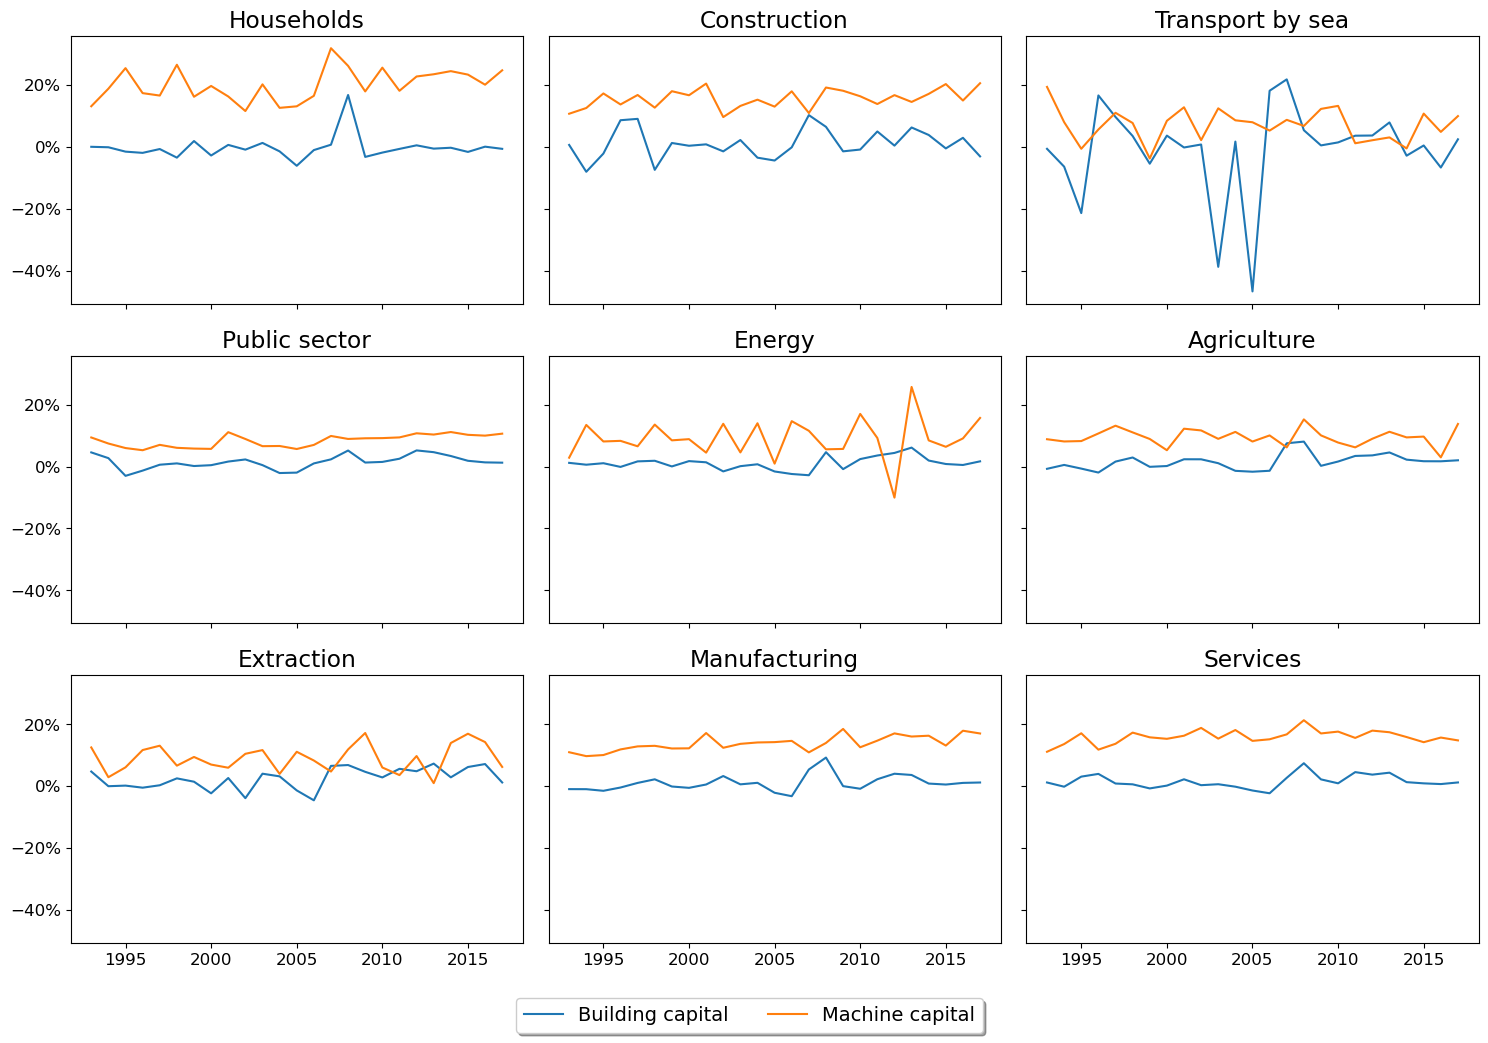

In [38]:
plot_delta(delta)

From the figure above it is apparent that the depreciation rate for Machine capital in general is higher than the depreciation rate for building capital. It is also aparent that there are big differences in the depreciation rates across sectors. There doesn't seem to be any trends in the depreciation rates.